In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()

In [3]:
optResults = pd.read_csv('opt_vs_heuristic_tests2.csv')
optResults.head()

,population_n,infected,h,algo,p,q,L,connectedness,sim_id
0,2,1.0,0,optimal,0.01,0.0,0,0.01,0
1,2,1.0,1,optimal,0.01,0.0,0,0.01,0
2,2,1.0,2,optimal,0.01,0.0,0,0.01,0
3,2,1.0,3,optimal,0.01,0.0,0,0.01,0
4,2,1.0,4,optimal,0.01,0.0,0,0.01,0


In [4]:
optFiltered = optResults[optResults.algo =='optimal']

Text(0, 0.5, 'Number Infected')

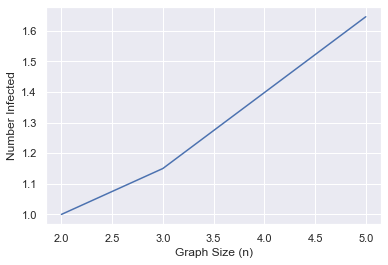

In [15]:
popSummOpt = optFiltered.groupby(['population_n']).agg({'infected':np.mean}).reset_index()
sns.lineplot(data=popSummOpt, x='population_n', y = 'infected')
sns.mpl.pyplot.xlabel('Graph Size (n)')
sns.mpl.pyplot.ylabel('Number Infected')

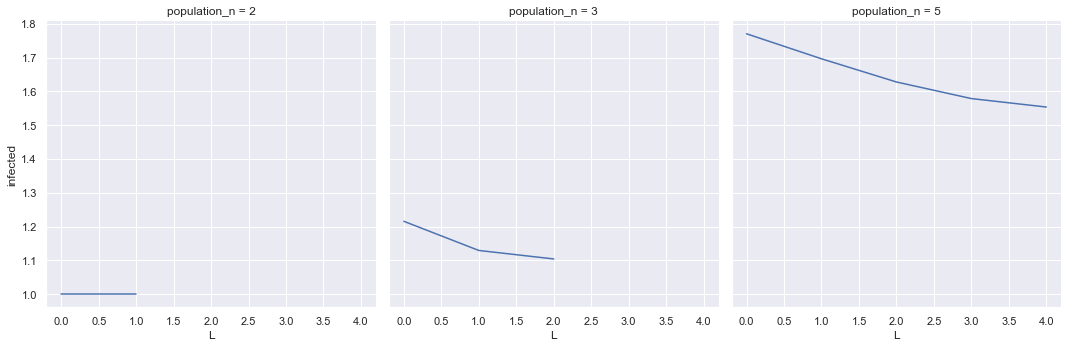

In [10]:
popSummOpt = optFiltered.groupby(['population_n','L']).agg({'infected':np.mean}).reset_index()
sns.relplot(data=popSummOpt, x='L', y = 'infected', kind='line', col='population_n')

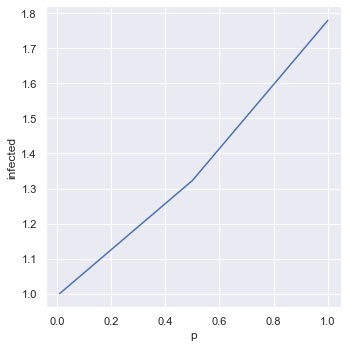

In [11]:
popSummOpt = optFiltered.groupby(['p']).agg({'infected':np.mean}).reset_index()
sns.relplot(data=popSummOpt, x='p', y = 'infected', kind='line')

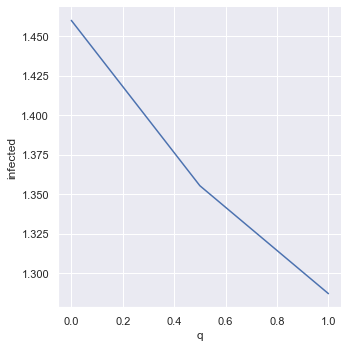

In [12]:
popSummOpt = optFiltered.groupby(['q']).agg({'infected':np.mean}).reset_index()
sns.relplot(data=popSummOpt, x='q', y = 'infected', kind='line')

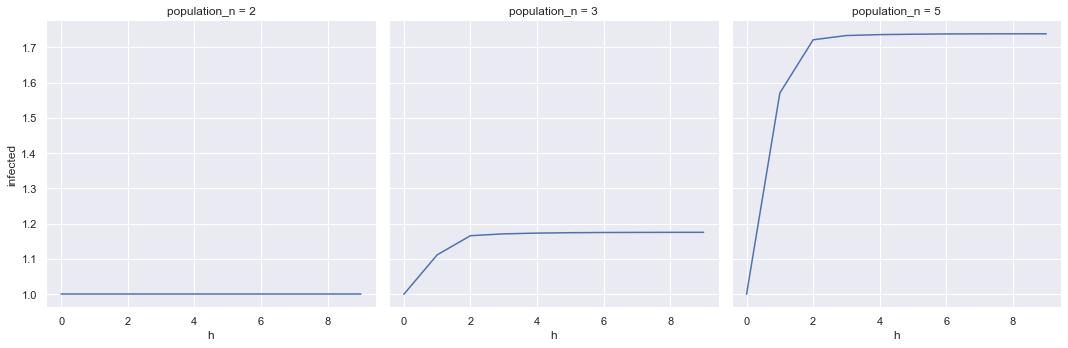

In [14]:
popSummOpt = optFiltered.groupby(['h','population_n']).agg({'infected':np.mean}).reset_index()
sns.relplot(data=popSummOpt, x='h', y = 'infected', kind='line', col='population_n')

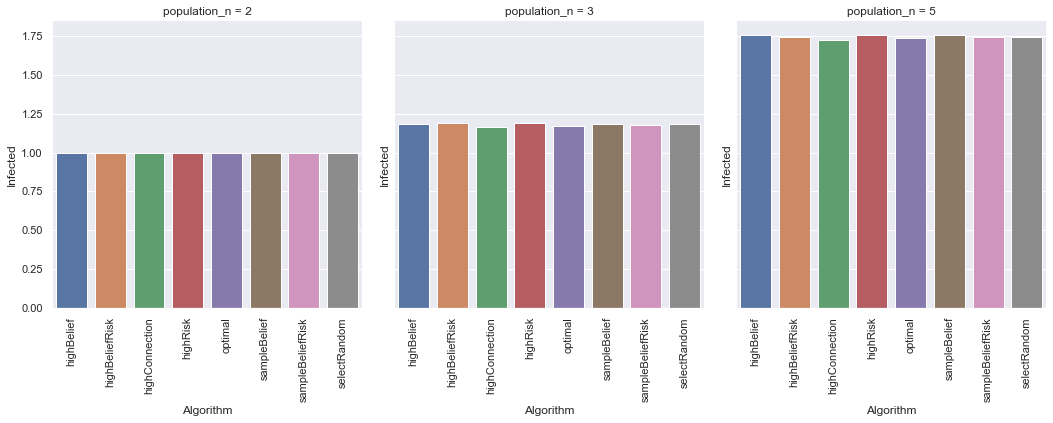

In [72]:
summarized_opt = optResults[optResults.h == 4].groupby(['algo','population_n']).agg({'infected': np.mean}).reset_index()

fg = sns.catplot(data=summarized_opt, x='algo', col='population_n', y='infected', kind='bar')
fg.set_xticklabels(rotation=90)

for i in range(fg.axes.shape[1]):
    fg.axes[0,i].set_xlabel('Algorithm')
    fg.axes[0,i].set_ylabel('Infected')


Text(0, 0.5, 'Infections')

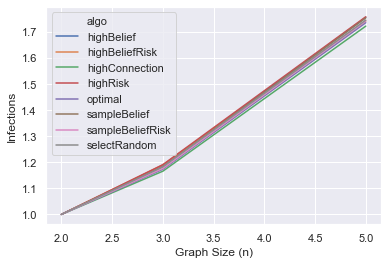

In [74]:
sns.lineplot(data=summarized_opt, x='population_n',y='infected',hue='algo')
sns.mpl.pyplot.xlabel('Graph Size (n)')
sns.mpl.pyplot.ylabel('Infections')

Text(30.453124999999993, 0.5, 'Algorithm')

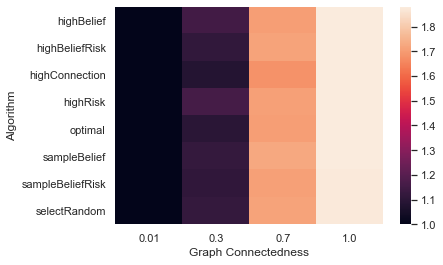

In [63]:
summarized_pivot = optResults[optResults.h == 4].groupby(['algo','connectedness']).agg({'infected': np.mean}).reset_index()
sns.heatmap(summarized_pivot.pivot(index='algo', columns='connectedness', values='infected'))
sns.mpl.pyplot.xlabel('Graph Connectedness')
sns.mpl.pyplot.ylabel('Algorithm')


Text(0, 0.5, 'Number Infected')

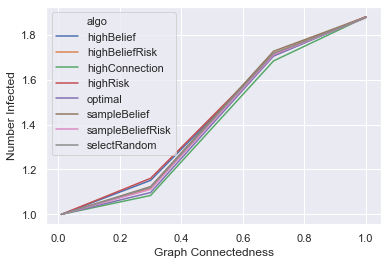

In [64]:
sns.lineplot(data=summarized_pivot, x='connectedness', y='infected',hue='algo')
sns.mpl.pyplot.xlabel('Graph Connectedness')
sns.mpl.pyplot.ylabel('Number Infected')

Text(30.453124999999993, 0.5, 'Algorithm')

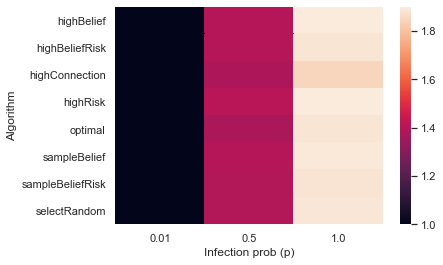

In [65]:
summarized_pivotP = optResults[optResults.h == 4].groupby(['algo','p']).agg({'infected': np.mean}).reset_index()
sns.heatmap(summarized_pivotP.pivot(index='algo', columns='p', values='infected'))
sns.mpl.pyplot.xlabel('Infection prob (p)')
sns.mpl.pyplot.ylabel('Algorithm')

Text(30.453124999999993, 0.5, 'Algorithm')

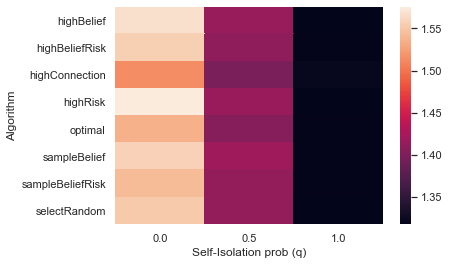

In [70]:
summarized_pivotQ = optResults[optResults.h == 4].groupby(['algo','q']).agg({'infected': np.mean}).reset_index()
sns.heatmap(summarized_pivotQ.pivot(index='algo', columns='q', values='infected'))
sns.mpl.pyplot.xlabel('Self-Isolation prob (q)')
sns.mpl.pyplot.ylabel('Algorithm')

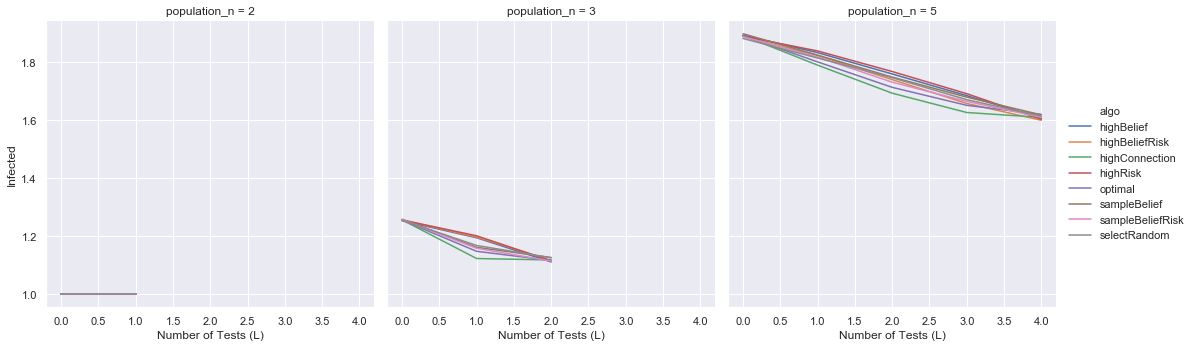

In [71]:
summarized_pivotL = optResults[optResults.h == 4].groupby(['algo','L','population_n']).agg({'infected': np.mean}).reset_index()
fg = sns.relplot(data=summarized_pivotL, x='L', y='infected',hue='algo',col='population_n', kind='line')
for i in range(fg.axes.shape[1]):
    fg.axes[0,i].set_ylabel('Infected')
    fg.axes[0,i].set_xlabel('Number of Tests (L)')

In [32]:
summarized_opt

,algo,population_n,infected
0,highBelief,2,1.000000
1,highBelief,3,1.222377
2,highBelief,5,1.779148
3,highBeliefRisk,2,1.000000
4,highBeliefRisk,3,1.221975
5,highBeliefRisk,5,1.780111
6,highConnection,2,1.000000
7,highConnection,3,1.221728
8,highConnection,5,1.774111
9,highRisk,2,1.000000


In [25]:
heurResults = pd.read_csv('heuristic_tests_random_graph_n=200v2.csv')
heurResults.head()

,infected,h,algo,p,q,L,connectedness,sim_id
0,1.0,0,selectRandom,0.0,0.0,0,0.1,0
1,1.0,1,selectRandom,0.0,0.0,0,0.1,0
2,1.0,2,selectRandom,0.0,0.0,0,0.1,0
3,1.0,3,selectRandom,0.0,0.0,0,0.1,0
4,1.0,4,selectRandom,0.0,0.0,0,0.1,0


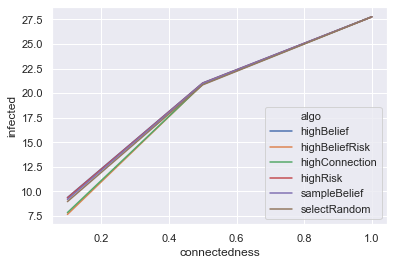

In [44]:
summarized = heurResults[heurResults.h == 4].groupby(['algo','connectedness']).agg({'infected':'mean'}).reset_index()
summarized.head()
sns.lineplot(data=summarized, x='connectedness', y='infected', hue='algo')

Text(30.453124999999993, 0.5, 'Algorithm')

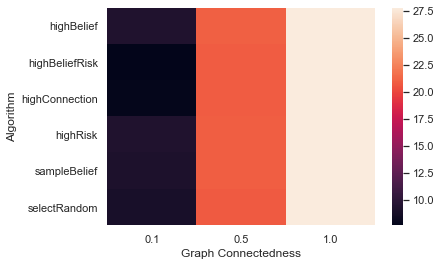

In [65]:
sns.heatmap(summarized.pivot(index='algo', columns='connectedness', values='infected'))
sns.mpl.pyplot.xlabel('Graph Connectedness')
sns.mpl.pyplot.ylabel('Algorithm')

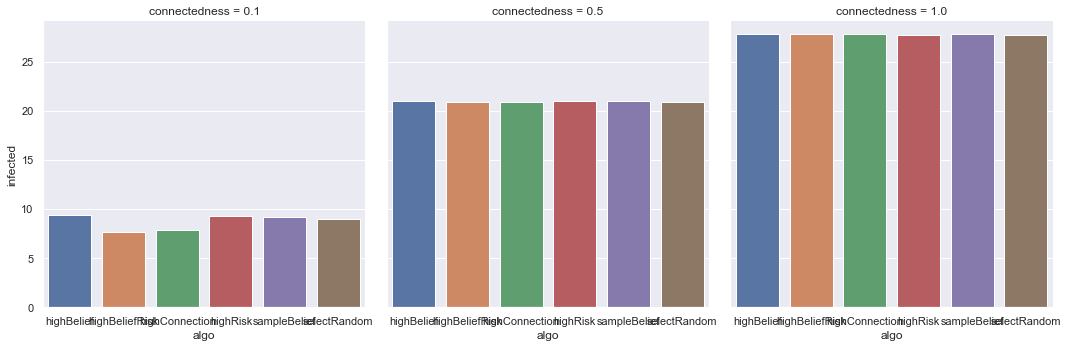

In [57]:
summarized = heurResults[heurResults.h == 4].groupby(['algo','connectedness']).agg({'infected':'mean'}).reset_index()
summarized.head()
sns.catplot(data=summarized, x='algo',y='infected', col='connectedness', kind='bar')


In [17]:
lucy = pd.read_csv('Connectivity_Ratio.csv')
lucy.head()

,Sigma,R,InMajor/Total,TotalConnection
0,3,0.0,0.186534,1812
1,3,0.3,0.195747,1599
2,3,0.7,0.392042,1709
3,3,1.0,0.631813,899
4,5,0.0,0.184449,1762


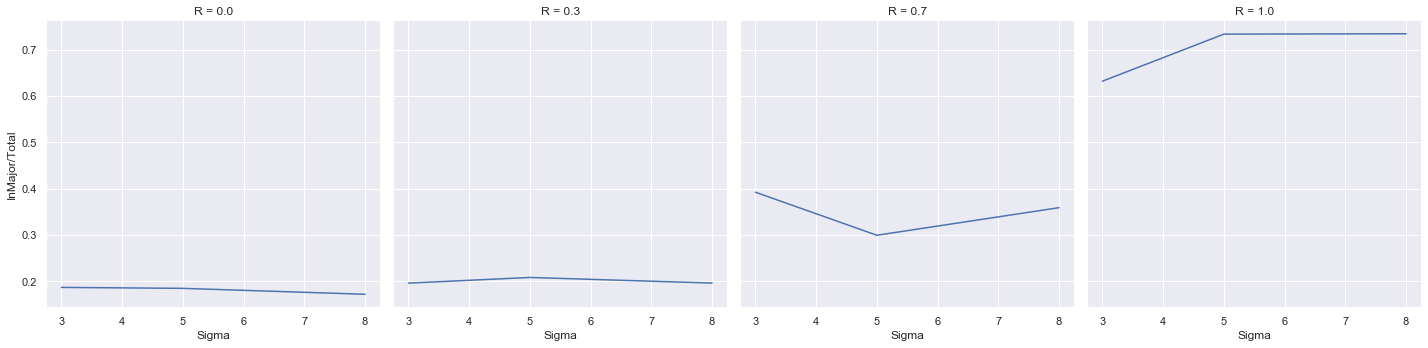

In [23]:
lucyAgg = lucy.groupby(['R','Sigma']).agg({'InMajor/Total':'mean', 'TotalConnection':'mean'}).reset_index()
sns.relplot(data=lucyAgg, x='Sigma', y='InMajor/Total', col ='R', kind='line')


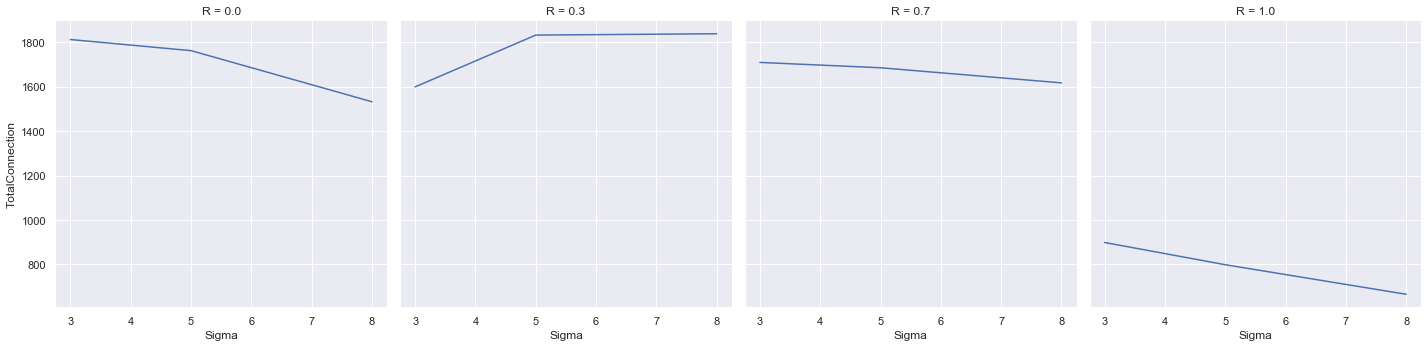

In [24]:
sns.relplot(data=lucyAgg, x='Sigma', y='TotalConnection', col ='R', kind='line')


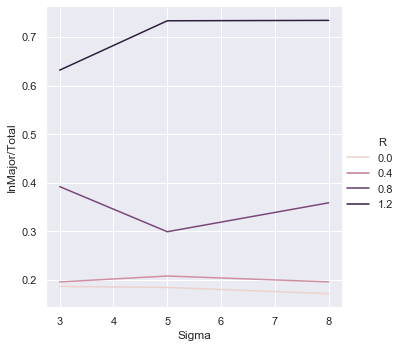

In [25]:
sns.relplot(data=lucyAgg, x='Sigma', y='InMajor/Total', hue ='R', kind='line')

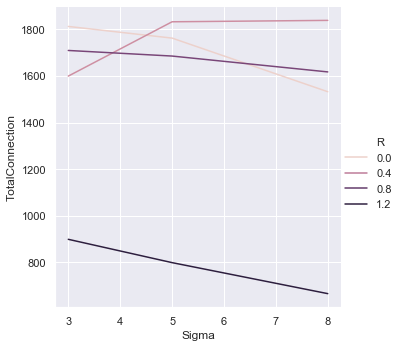

In [26]:
sns.relplot(data=lucyAgg, x='Sigma', y='TotalConnection', hue ='R', kind='line')

In [6]:
uni = pd.read_csv('results/sim_results_avg_r_sd.csv')
uni.head()

,p,q,L,priority_percentage,sd,avg total infected
0,0.01,0.0,25,0.0,3,1.84
1,0.01,0.3,25,0.0,3,1.22
2,0.01,0.7,25,0.0,3,0.92
3,0.30,0.0,25,0.0,3,81.86
4,0.30,0.3,25,0.0,3,68.74


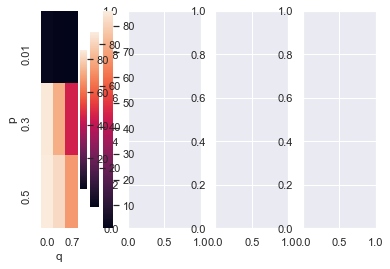

In [50]:
df = (uni[uni.priority_percentage == 0]
 .groupby(['p','q']).
    agg({'avg total infected':'mean'}).
    reset_index().
    pivot(index = 'p', columns = 'q', values = 'avg total infected'))

sns.heatmap(df, ax = ax[0])

In [46]:
uni.priority_percentage.unique()

array([0. , 0.3, 0.7, 1. ])

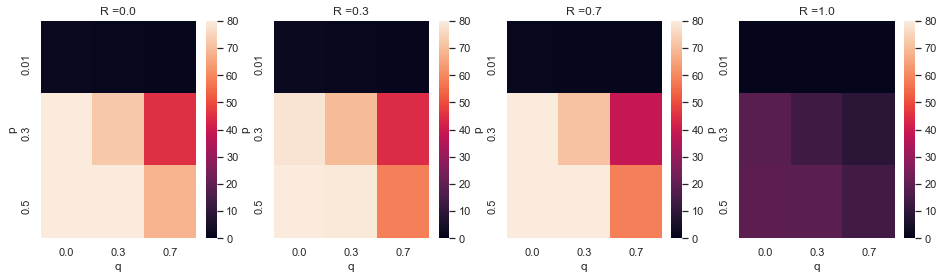

In [4]:
import matplotlib.pyplot as plt

fg, ax = plt.subplots(1,4, constrained_layout=False, figsize=(16, 4))

for i in range(4):
    R = uni.priority_percentage.unique()[i]
    a_R = ax[i]
    df = (uni[uni.priority_percentage == R]
     .groupby(['p','q']).
        agg({'avg total infected':'mean'}).
        reset_index().
        pivot(index = 'p', columns = 'q', values = 'avg total infected'))
    sns.heatmap(df, ax = a_R, vmin = 0, vmax = 80)
    a_R.title.set_text('R ='+str(R))

In [3]:
uni.sd.unique()

array([3, 5, 8])

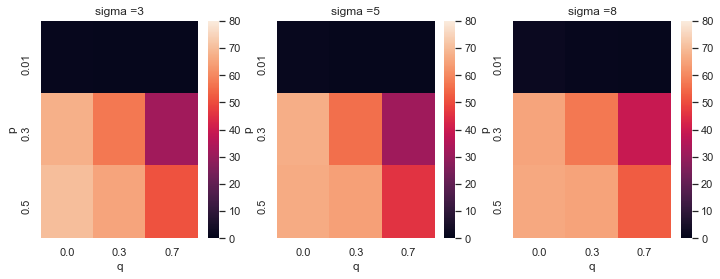

In [8]:
import matplotlib.pyplot as plt

fg, ax = plt.subplots(1,3, constrained_layout=False, figsize=(12, 4))

for i in range(3):
    R = uni.sd.unique()[i]
    a_R = ax[i]
    df = (uni[uni.sd == R]
     .groupby(['p','q']).
        agg({'avg total infected':'mean'}).
        reset_index().
        pivot(index = 'p', columns = 'q', values = 'avg total infected'))
    sns.heatmap(df, ax = a_R, vmin = 0, vmax = 80)
    a_R.title.set_text('sigma ='+str(R))